### Codificación con Pandas get_dummies

Hasan Ersan Yagci

https://hersanyagci.medium.com/encoding-with-pandas-get-dummies-2f95709adfd

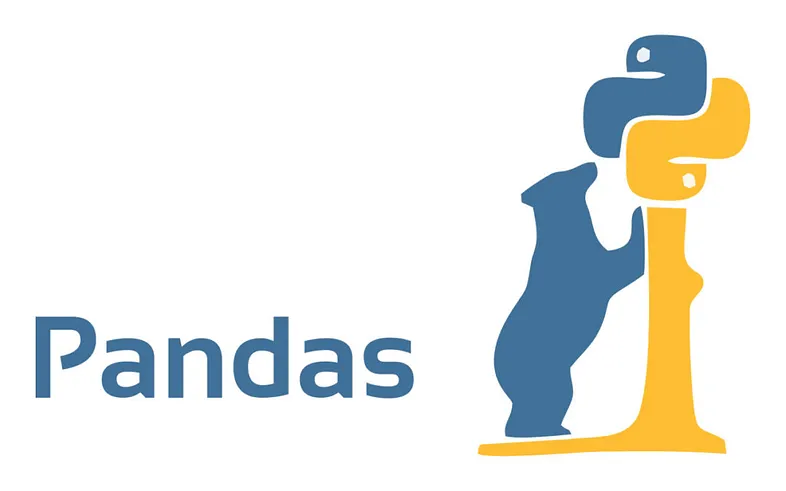

Anteriormente abordamos el tema de la codificación y su importancia. En resumen, los modelos de aprendizaje automático son modelos matemáticos que utilizan algoritmos que funcionan con tipos de datos numéricos, y las redes neuronales también funcionan con tipos de datos numéricos. Por lo tanto, necesitamos métodos de codificación para convertir datos no numéricos en datos numéricos significativos. Hemos abordado los métodos de codificación y las opciones que podemos aplicar a estos métodos de codificación en este enlace [https://hersanyagci.medium.com/label-encoding-vs-one-hot-encoding-e8a10916da5b].

En esta historia, veremos el método get_dummies de Pandas. Get_dummies de Pandas es la forma más sencilla de implementar un método de codificación activa y tiene parámetros muy útiles, de los cuales mencionaremos los más importantes. Con get_dummies podemos obtener un marco de datos de codificador activo (variables ficticias) en una fila.

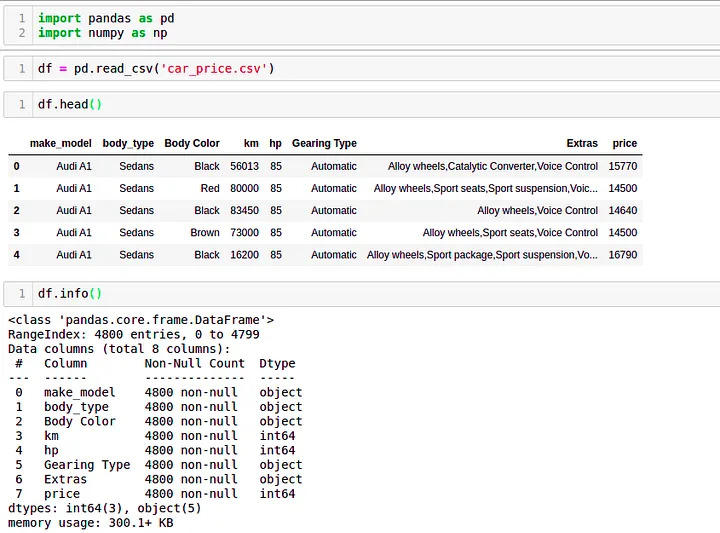

__* Mirar archivo `clase74-pd-get_dummies-Sklearn_Encoding.ipynb`__

Como puedes ver, los datos no tienen valores faltantes y adquirí esta estructura después de manejar los valores atípicos. Puedes consultar este enlace[https://hersanyagci.medium.com/detecting-and-handling-outliers-with-pandas-7adbfcd5cad8] para ver cómo detectar y manejar los valores atípicos con pandas.

Tenemos 5 columnas categóricas que necesitamos convertir en numéricas antes del algoritmo de aprendizaje automático. Estas columnas son: “make_model”, “body_type”, “Body Color”, “Gear Type” y “Extras”, todas ellas son datos nominales. Por ejemplo, para “Body Color” no hay jerarquía entre colores. El negro no tiene superioridad sobre el rojo. Es por eso que tenemos que usar un codificador activo.

Primero, simplemente aplicaremos get_dummies a la columna “Color del cuerpo” para ver los detalles de get_dummies, luego usaremos todo el marco de datos;

__1 - get_dummies()__

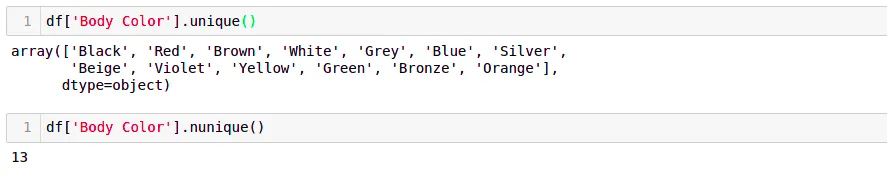

La columna “Color del cuerpo”(Body Color) tiene 13 valores únicos, lo que significa que obtendremos 13 columnas después de aplicar get_dummies.

Con esta sintaxis podemos aplicar get_dummies a una columna de dataframe;

__pd.get_dummies(df['Body Color'])__

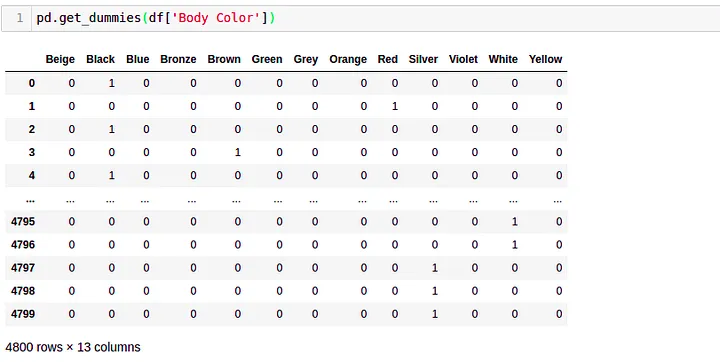

No usamos ningún parámetro, get_dummies tiene parámetros predeterminados. Como puede ver, obtuvimos un marco de datos de 13 columnas después de get_dummies. Hay 4800 filas. Podemos ver el color del automóvil. Por ejemplo, el color del primer automóvil es negro, el color del segundo automóvil es rojo, etc.

Nuestro marco de datos original, df, mantiene su forma. Debemos fusionar estos marcos de datos. Ahora podemos asignar las variables ficticias de “Body Color” (un codificador activo) a un nuevo marco de datos para fusionarlo con el marco de datos principal.

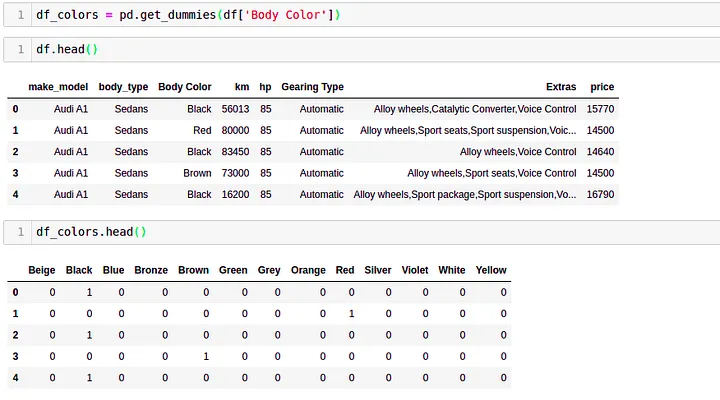

Ahora los fusionaremos en marcos de datos mediante el método de unión. Pero deberíamos eliminar la columna "Color del cuerpo", ya que ya no la necesitamos porque no es numérica.

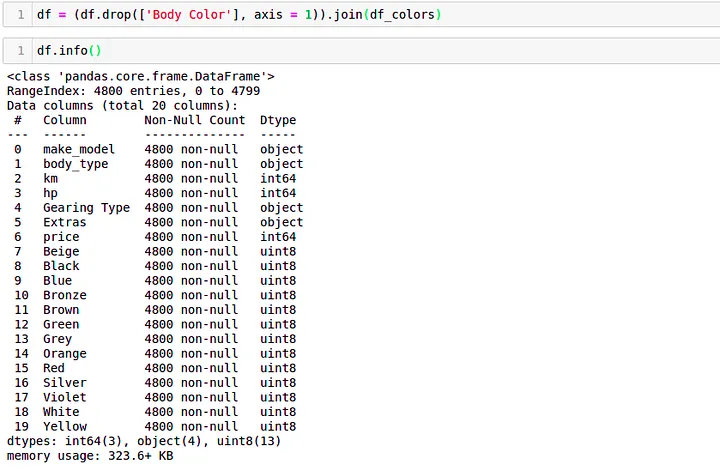

Con esta sintaxis, eliminamos la columna “Color del cuerpo” y agregamos nuestras variables ficticias. Como puede ver, todos los colores tienen una columna y los tipos de columna son numéricos.

__2 - get_dummies con el parámetro ‘drop_first’__

Una columna transformada en 13 columnas. Podemos usar el parámetro 'drop_first' y disminuir una columna. Podemos tomar 12 columnas. Normalmente el valor predeterminado de este parámetro es 'False', simplemente lo configuramos en 'True'. Veamos cómo funciona.

__pd.get_dummies(df['Body Color'], drop_first = True)__

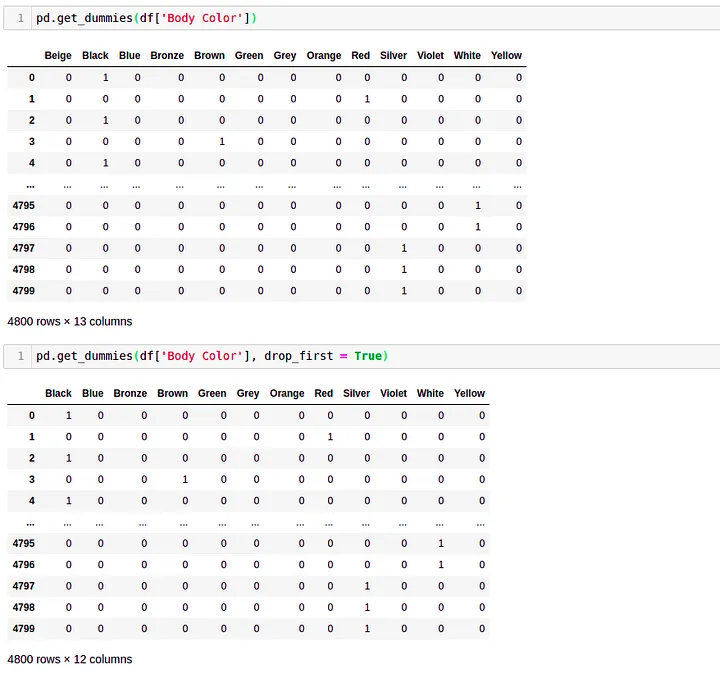

Verifique el número de columnas, en lugar de 13 tenemos 12 columnas.

Elimina la primera columna del marco de datos get_dummies. La primera columna de la columna "Color de la carrocería" es Beige. Si hay un automóvil beige, todas las columnas son 0. Cuando todas las columnas son 0, el modelo sabe que es un automóvil beige. Vea el ejemplo a continuación.

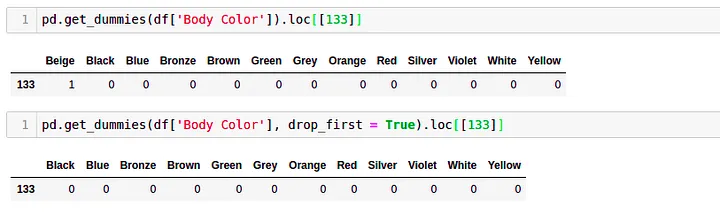

Más columnas significan menos rendimiento y más tiempo de entrenamiento. Imaginemos que tenemos 20 columnas que no son numéricas. Si usamos 'drop_first', obtenemos 20 columnas menos. Por lo tanto, es útil usar el parámetro drop_first para el rendimiento del modelo.

__3 - get_dummies con parámetro ‘prefix’__

Si el marco de datos tuviera la columna “Color de la tapicería”, también obtendríamos una columna negra o marrón para el color de las baldosas después de get_dummies, excepto “Color de la carrocería”. Varias columnas con el mismo nombre pueden causar problemas. Podemos usar el parámetro 'prefijo' para evitar esta situación.

__pd.get_dummies(df['Body Color'], drop_first = True, prefix = 'BC')__

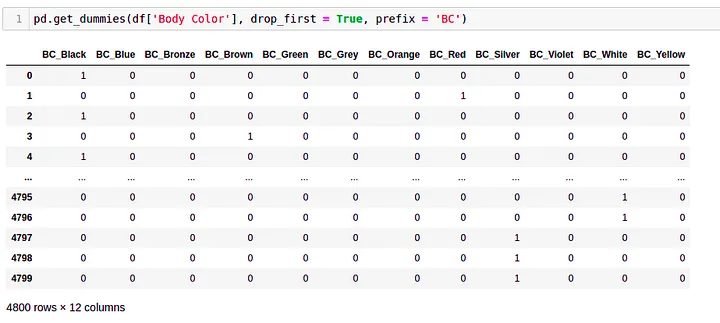

Este parámetro agrega la palabra como prefijo con un guión bajo. Para el ejemplo anterior, hemos utilizado el prefijo BC.

__4 - get_dummies con parámetro‘columns’__

Podemos aplicar get_dummies directamente a un marco de datos en lugar de aplicarlo individualmente. Agregará automáticamente el nombre de la columna como prefijo para cada variable ficticia.

__pd.get_dummies(df, drop_first = True)__

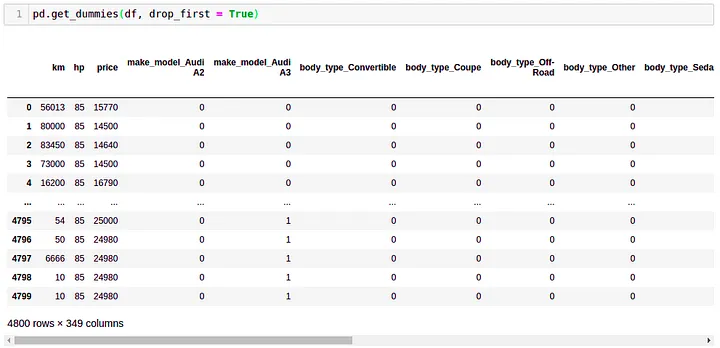

Pero el marco de datos evolucionó a 349 columnas porque la columna “Extras” tiene muchos valores únicos. Tenemos que considerar esta columna individualmente. En este caso, podemos usar el parámetro columnas.

__pd.get_dummies(df, columns = ['make_model', 'body_type', 'Body Color', 'Gearing Type'], drop_first = True)__

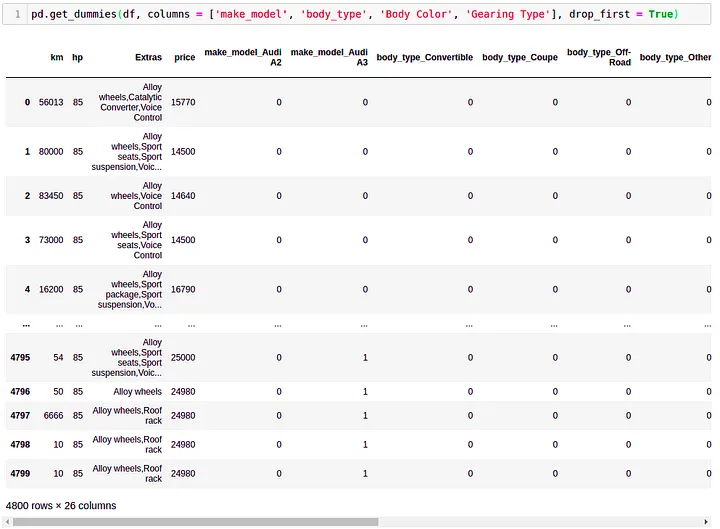

Con el parámetro columnas, podemos aplicar las columnas que queramos. De esta forma, podremos gestionar columnas personalizadas más adelante con str.get_dummies.

__4 - str.get_dummies__

El método str.get_dummies es una versión de get_dummies que se puede aplicar a una serie. Es una versión que maneja cadenas. El método str.get_dummies() divide cada cadena en la serie dada con el separador. Solo hay un parámetro separador.

En este marco de datos, hay algunas características de los automóviles en la columna "Extras". Por ejemplo, llantas de aleación, asientos deportivos, control por voz, etc. Estas características son importantes en términos de precio. Verifique a continuación, dice que hay 325 valores únicos. Sin embargo, hay 16 características adicionales. Los automóviles tienen una cantidad diferente de características adicionales.

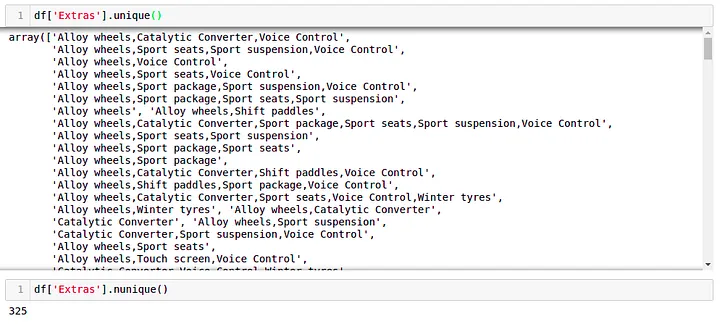

Si aplicamos get_dummies directamente, se agregan 325 columnas más. Por lo tanto, debemos usar str.get_dummies. Usamos una coma (,) como separador porque los valores en los datos están separados por comas (,).

__df['Extras'].str.get_dummies(',')__

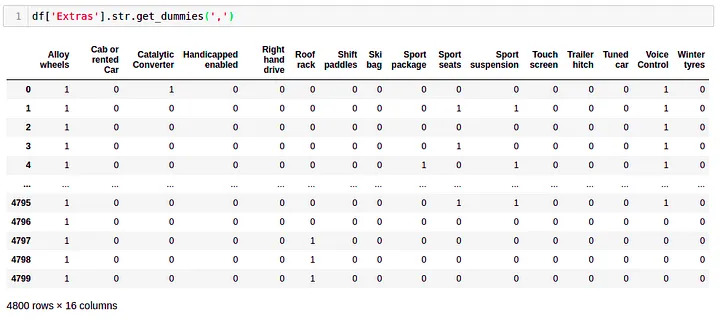

Como puedes ver, hay 16 características adicionales. Busca la primera fila. Tiene llantas de aleación, convertidor catalítico y control de sonido; estos son 1, los demás son 0.

Ahora obtengamos la última versión del marco de datos fusionándolos;

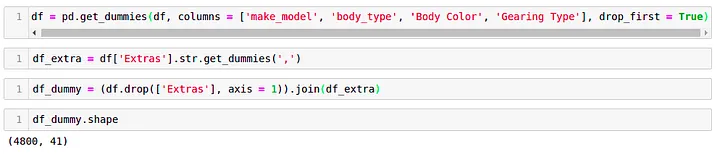

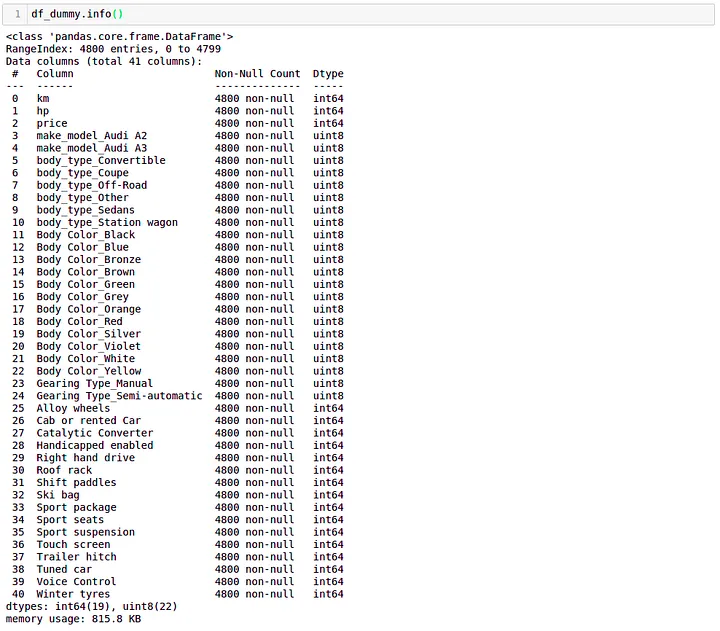

Todas las columnas son numéricas. Nuestros datos ya están listos para el modelo.

__Conclusión__

Get_dummies de Pandas es el toque final de los datos antes de modelar, ya que tenemos que convertir todas las columnas no numéricas en numéricas. Tenemos que usarlo o algún otro método para obtener las tablas de codificación o las variables ficticias. Pero, como puede ver, get_dummies es la forma más sencilla y tiene muchos parámetros que hacen que nuestro modelo sea más legible y fluido.

Importa los datos, trátalos con valores faltantes y atípicos y luego aplica get_dummies. Ya está listo para el modelo.

---------

### __INVESTIGACIÓN SOBRE `get_dummies` Y `One-Hot Encoding`__


Tanto `get_dummies` como `one-hot encoding` son métodos utilizados para transformar variables categóricas en variables numéricas, lo cual es necesario para que los modelos de machine learning puedan procesarlas. Aunque los términos "get_dummies" y "one-hot encoding" a menudo se utilizan indistintamente, hay diferencias sutiles en su implementación y uso en las bibliotecas de Python, específicamente en pandas y scikit-learn. Aquí tenemos un análisis detallado de las diferencias entre ambos enfoques:

### __1. Concepto Básico de `One-Hot Encoding`__

__One-hot encoding__ es un proceso que convierte variables categóricas en una serie de variables binarias ('0' y '1' ó 'True' o 'False'). Cada categoría única en la variable categórica se convierte en una nueva columna, y en cada fila, la columna correspondiente a la categoría presente toma el valor 1, mientras que todas las demás columnas toman el valor 0.

__Ejemplo__:

Si tienes una columna "Color" con tres posibles valores ("rojo", "azul", "verde"), el one-hot encoding lo transformaría en tres columnas binarias:

- rojo → [1, 0, 0]
- azul → [0, 1, 0]
- verde → [0, 0, 1]

### __2. `pandas.get_dummies()`__

__'pandas.get_dummies()'__ es una función de la biblioteca pandas que implementa one-hot encoding de manera sencilla y directa. Veamos sus características principales:

__Características__:

- __Automático__: Convierte automáticamente todas las columnas categóricas de un DataFrame en columnas de indicadores (dummies) sin necesidad de especificar manualmente las categorías.
- __Soporte Multicolumna__: Puede aplicar one-hot encoding a múltiples columnas de un DataFrame al mismo tiempo.
- __Opciones de Prefijo__: Puedes agregar prefijos a los nombres de las nuevas columnas para indicar la columna original de la cual provienen.
- __Manejo de Valores Nulos__: Puede manejar valores nulos (NaN) reemplazándolos por una columna separada que indica si el valor era nulo.
- __Eliminación de una Categoría__ (Drop First): Tiene la opción de eliminar una de las columnas generadas para evitar la multicolinealidad (opción drop_first=True).

__Ejemplo:__

In [2]:
import pandas as pd

# DataFrame de ejemplo
df = pd.DataFrame({
    'Color': ['rojo', 'azul', 'verde', 'rojo'],
    'Tamaño': ['grande', 'pequeño', 'mediano', 'grande']
})

# Aplicar get_dummies
df_dummies = pd.get_dummies(df, columns=['Color', 'Tamaño'], drop_first=True)

print(df_dummies.astype(int))

   Color_rojo  Color_verde  Tamaño_mediano  Tamaño_pequeño
0           1            0               0               0
1           0            0               0               1
2           0            1               1               0
3           1            0               0               0


__Ventajas de `get_dummies`__:

- __Facilidad de uso__: Simple de usar con DataFrames de pandas, lo que lo hace muy conveniente para la exploración de datos.
- __Automatización__: Detecta automáticamente todas las variables categóricas en el DataFrame y las transforma.
- __Flexibilidad__: Permite manipular nombres de columnas, manejar valores nulos y eliminar una de las categorías para prevenir multicolinealidad.

__Desventajas de `get_dummies`__:

- __No es parte de una pipeline__: get_dummies no se integra directamente en una pipeline de scikit-learn, lo que puede ser inconveniente cuando se trabaja en un flujo de trabajo de machine learning más complejo.
- __Difícil manejo con datos nuevos__: Si el DataFrame cambia (nuevas categorías o columnas), puede resultar complicado aplicar el mismo encoding a los datos nuevos.

### __3. `OneHotEncoder` de scikit-learn__

El `OneHotEncoder` es una clase en scikit-learn que realiza un one-hot encoding similar al de `get_dummies`, pero con más control y opciones para ajustarse a un flujo de trabajo de machine learning más robusto y reproducible.

__Características__:

- __Encajado y Transformación__: `OneHotEncoder` sigue la lógica de `fit()` y `transform()` de scikit-learn, lo que permite que se ajuste a los datos de entrenamiento y luego se aplique de manera consistente a los datos de prueba o nuevos datos.
- __Soporte Multicolumna__: Puede manejar múltiples columnas categóricas simultáneamente.
- __Manejo de Categorías Desconocidas__: Puede manejar categorías que no se encontraban en el conjunto de entrenamiento, configurando cómo deben tratarse (ignorarlas o generar un error).
- __Integración en Pipelines__: `OneHotEncoder` se integra perfectamente en pipelines de scikit-learn, lo que facilita la creación de flujos de trabajo de machine learning complejos y reproducibles.
- __Sparse Matrices__: Tiene la opción de devolver los resultados en forma de matrices dispersas (sparse matrices), lo cual es útil para conjuntos de datos grandes con muchas categorías.

__Ejemplo__:

In [3]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# DataFrame de ejemplo
df = pd.DataFrame({
    'Color': ['rojo', 'azul', 'verde', 'rojo'],
    'Tamaño': ['grande', 'pequeño', 'mediano', 'grande']
})

# Inicializar OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Aplicar fit_transform
encoded_data = encoder.fit_transform(df)

print(encoded_data)

[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 1. 0.]
 [1. 0. 0. 0.]]


__Ventajas de `OneHotEncoder`__:

- __Control completo__: Mayor control sobre el proceso de encoding, especialmente en flujos de trabajo de machine learning.
- __Integración en pipelines__: Puede ser fácilmente integrado en pipelines, lo que facilita su uso en modelos de machine learning.
- __Reusabilidad__: Permite encajar el encoder en los datos de entrenamiento y luego transformarlo consistentemente en datos nuevos o de prueba.
- __Manejo de categorías desconocidas__: Puedes especificar cómo manejar categorías desconocidas (por ejemplo, ignorarlas en lugar de lanzar un error).

__Desventajas de `OneHotEncoder`__:

- __Mayor complejidad__: Es más complejo de usar en comparación con get_dummies para tareas simples de preprocesamiento de datos.
- __Curva de aprendizaje__: Requiere familiarizarse con el paradigma de fit y transform de scikit-learn, lo cual puede ser innecesario para tareas simples de análisis exploratorio de datos.

### __4. Comparación Directa__

| **Aspecto**                     | **`pandas.get_dummies()`**                | **`OneHotEncoder` de scikit-learn**   |
|---------------------------------|--------------------------------------------|---------------------------------------|
| **Facilidad de uso**            | Muy fácil de usar, ideal para tareas rápidas de preprocesamiento. | Requiere más configuración, ideal para flujos de trabajo complejos. |
| **Integración en Pipelines**    | No se integra fácilmente en pipelines de scikit-learn. | Perfectamente integrado en pipelines de scikit-learn. |
| **Automatización**              | Detecta automáticamente columnas categóricas en DataFrames de pandas. | Requiere especificar las columnas a transformar. |
| **Manejo de nuevas categorías** | No maneja categorías nuevas en datos de prueba. | Puede manejar nuevas categorías con opciones configurables. |
| **Sparse Output**               | No soporta matrices dispersas. | Puede devolver matrices dispersas para ahorro de memoria. |
| **Manejo de valores nulos**     | Puede manejar NaN automáticamente. | Requiere manejo de NaN antes de su uso. |
| **Opciones de transformación**  | Menos opciones de personalización. | Más opciones de personalización (drop, sparse, handle_unknown). |
| **Flexibilidad**                | Menos flexible en contextos fuera de pandas. | Muy flexible, adaptable a diferentes contextos de machine learning. |

### **Conclusión**

- **`pandas.get_dummies()`** es ideal para análisis de datos rápidos y exploratorios, donde se necesita transformar variables categóricas en un DataFrame pandas de manera rápida y sencilla. Es la opción más simple y directa si no necesitas integración con pipelines de scikit-learn o manejo de nuevas categorías en datos de prueba.
  
- **`OneHotEncoder` de scikit-learn** es la opción preferida cuando estás trabajando en un flujo de trabajo de machine learning más formal y necesitas integrar el proceso de encoding en una pipeline, manejar categorías desconocidas o generar matrices dispersas. Proporciona un control más fino sobre el proceso de transformación y es más adecuado para escenarios donde la reproducibilidad y el manejo robusto de datos son esenciales.